In [1]:
import hdf5plugin
import scanorama
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context

In [2]:
ADATA_PATH = "./data/4_concatenated_h5ad/lung_cancer_concat_data_v3.h5ad"

In [3]:
merged_adata = sc.read_h5ad(ADATA_PATH)
merged_adata

AnnData object with n_obs × n_vars = 45228 × 8687
    obs: 'tissue', 'cell_type', 'batch'

### Preprocessing steps

In [4]:
sc.pp.normalize_total(merged_adata, target_sum=1e4)
sc.pp.log1p(merged_adata)
sc.pp.scale(merged_adata, max_value=10)
sc.tl.pca(merged_adata, svd_solver='arpack')
sc.pp.neighbors(merged_adata)
sc.tl.umap(merged_adata)

/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/umap/dist

### Visualize dataset before integration

In [ ]:
merged_adata.obs

/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


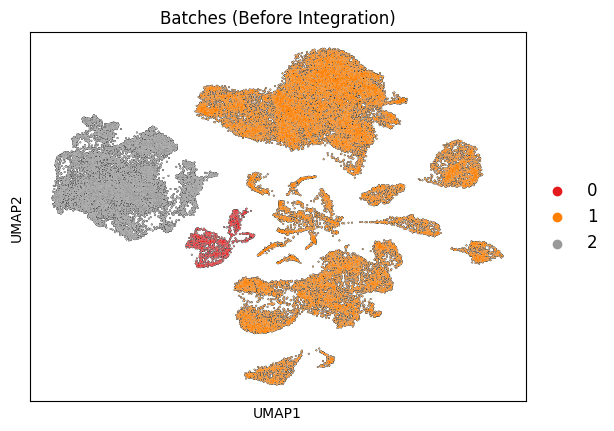

In [6]:
# sc.pl.umap(merged_adata, color="batch", legend_fontsize=12, legend_fontoutline=2, 
#            title='Batches (Before Integration)', show=False)

sc.pl.umap(merged_adata, color='batch', add_outline=True,
               legend_fontsize=12, legend_fontoutline=2,frameon=True,
               title='Batches (Before Integration)', palette='Set1', show=False)

plt.savefig('./umap_batches_concatenated_map_like.png', dpi=600, bbox_inches='tight')

/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


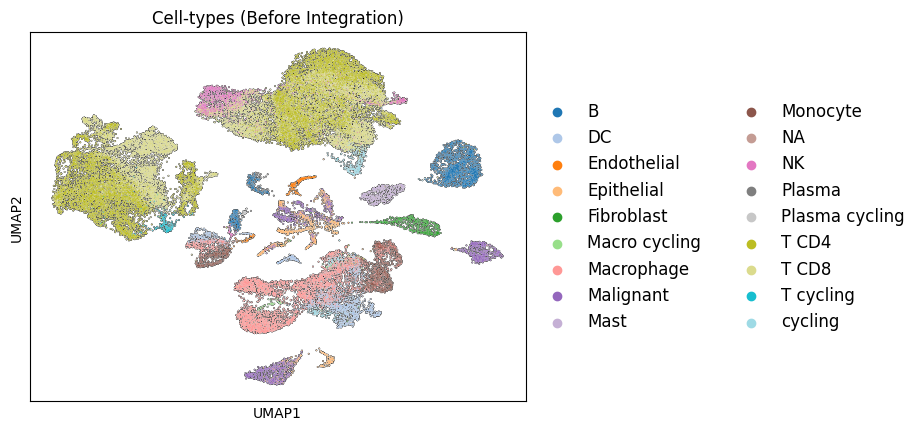

In [8]:
# sc.pl.umap(merged_adata, color="cell_type", legend_fontsize=12, legend_fontoutline=2, 
#            title='Cell-types (Before Integration)', show=False)


sc.pl.umap(merged_adata, color='cell_type', add_outline=True,
               legend_fontsize=12, legend_fontoutline=2,frameon=True,
               title='Cell-types (Before Integration)', palette='tab20', show=False)

plt.savefig('./umap_cell_types_concatenated_map_like.png', dpi=600, bbox_inches='tight')

/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:368: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/home/kostas/miniconda3/envs/scrna/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


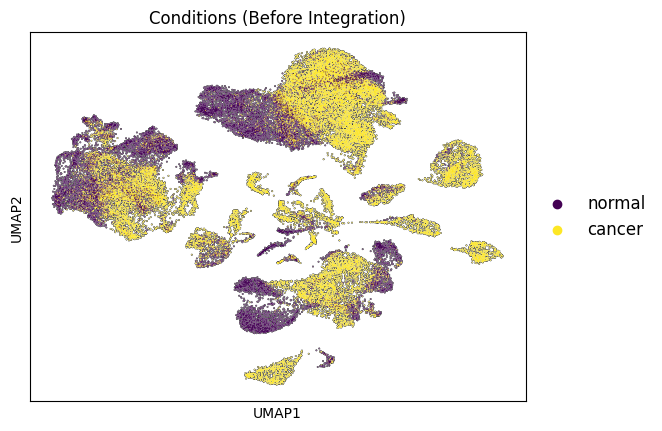

In [10]:
# sc.pl.umap(merged_adata, color="tissue", legend_fontsize=12, legend_fontoutline=2, 
#            title='Conditions', show=False)


sc.pl.umap(merged_adata, color='tissue', add_outline=True,
               legend_fontsize=12, legend_fontoutline=2,frameon=True,
               title='Conditions (Before Integration)', palette='viridis', show=False)

plt.savefig('./umap_conditions_concatenated_map_like.png', dpi=600, bbox_inches='tight')